In [67]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [68]:
wb_sheet=openpyxl.load_workbook('test_data.xlsx')
ws_sheet=wb_sheet.active

In [69]:
batsmen=pd.read_csv('batsman_data.csv')
bowler_data=pd.read_csv('bowler_data.csv')
data=pd.read_csv('test_data.csv')

In [70]:
#1 prediction based on wicket taking capability of pitch and of bowler and run conceding capability of pitch and bowler
    #bowler economy -> runs conceded based on economy,wicket rateof bowler, wicket rate of pitch
    #regress
#2 prediction based on runs scoring capability of batsman and of stadium

In [71]:
bowlers=dict()

for row in range(0,bowler_data.index[-1]):
    player_name1 = bowler_data.at[row,'Player_Name']
    player_name = player_name1[0:1] +" "+ player_name1[len(player_name1)-4 : len(player_name1)+1]
    bowlers.update({player_name:row})

def bowling_prediction(bowling_order):
    global bat_list, batsmen, bowlers, batsman_data, bowler_data, data

    score=0
    wickets=0
    for player in bowling_order:
        #get score
        s=get_bowler_value(player,'pp_economy')
        if s==0:
            s=bowler_data.at[0,'avg_pp_econ']
        score+=s
        #get wickets
        w=get_bowler_value(player,'wicket_economy')
        if w==0:
            w=bowler_data.at[0,'avg_pp_wicket']
        wickets+=w
    l1= [score, wickets]
    return l1

def get_bowling_order(bowl_list):
    # create a list of bowlers bowl[0-5] from bowl_list[] based on bowling pattern of the team
    global bat_list, batsmen, bowlers, batsman_data, bowler_data, data

    bowling_order=[]
    if len(bowl_list) == 2:
        for i in range(0, 6):
            bowling_order.append(bowl_list[i % 2])
    # for bowler length 3 and 4
    # add team dependent bowling strategy
    elif len(bowl_list) == 3:
        bowling_order = (bowl_list[0], bowl_list[1], bowl_list[0], bowl_list[1], bowl_list[0], bowl_list[2])
    elif len(bowl_list) == 4:
        bowling_order = (bowl_list[0], bowl_list[1], bowl_list[0], bowl_list[1], bowl_list[2], bowl_list[3])
    elif len(bowl_list) == 5:
        bowling_order = (bowl_list[0], bowl_list[1], bowl_list[0], bowl_list[2], bowl_list[3], bowl_list[4])
    elif len(bowl_list) == 6:
        bowling_order = bowl_list
    return bowling_order

def get_bowler_value(b,col):
    b=b.strip()
    player_name = b[0:1] +" "+ b[len(b)-4 : len(b)+1]

    row= bowlers.get(player_name)
    try:
        data= bowler_data.at[row,col]
    except KeyError:
        data=0
    return data

In [149]:
output,input_model,input_model2=[],[],[]
for rowx in range(2,ws_sheet.max_row-1):
    venue=ws_sheet.cell(row=rowx,column=1).value
    innings=ws_sheet.cell(row=rowx,column=2).value
    batting_team=ws_sheet.cell(row=rowx,column=3).value
    bowling_team=ws_sheet.cell(row=rowx,column=4).value
    bat_list=list(map(str,ws_sheet.cell(row=rowx,column=5).value.split(",")))
    bowl_list=list(map(str,ws_sheet.cell(row=rowx,column=6).value.split(",")))
    venue_wickets=ws_sheet.cell(row=rowx,column=17).value
    score=ws_sheet.cell(row=rowx,column=7).value
    
    bowling_order=get_bowling_order(bowl_list)
    
    for i in bat_list:
        if i == " ":
            bat_list.remove(i)
    for i in bowl_list:
        if i==" ":
            bowl_list.remove(i)
    
    #if 30<=score <=60:
    wickets=len(bat_list)-2
    bowler_pred= bowling_prediction(bowling_order)
    #,,venue_wickets
    input_model.append([bowler_pred[0],wickets])
    output.append(score)
    
    prediction = 0.37091807*bowler_pred[0] - 3.83388431*wickets + 33.87871819102332
    input_model2.append([ws_sheet.cell(row=rowx,column=13).value, prediction])
    #row is the stadium row and column is 
    #stadium_runs= stadium_data.at[stadiums.get(venue),'avg_score'+str(innings)]
    #stadium_wickets=stadium_data.at[stadiums.get(venue),'avg_wickets'+str(innings)]
    ws_sheet.cell(row=rowx,column=18,value=prediction)
wb_sheet.save("test_data.xlsx")
    #ws_sheet.cell(row=rowx,column=17,value=stadium_wickets)

In [144]:
#output_test,output,input_model,input_test=[],[],[],[]
#for row in range(0,data.index[-1]):
#    input_model.append([int(data.at[row,'batsman_prediction']),int(data.at[row,'venue_runs'])])
#    output.append(data.at[row,'score'])
x_train,x_test,y_train,y_test=train_test_split(input_model,output,test_size=0.2,random_state=45)
x_train2,x_test2,y_train2,y_test2=train_test_split(input_model2,output,test_size=0.2,random_state=899)
#for row in range(125,data.index[-1]):
 #   input_model_test.append([int(data.at[row,'batsman_prediction']),int(data.at[row,'venue_runs'])])
  #  output_test.append(data.at[row,'score'])

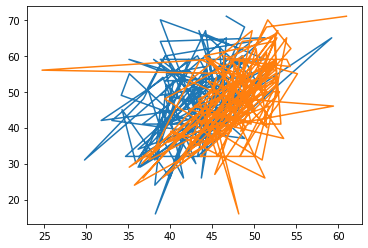

In [145]:
plt.plot(x_train2,y_train2)

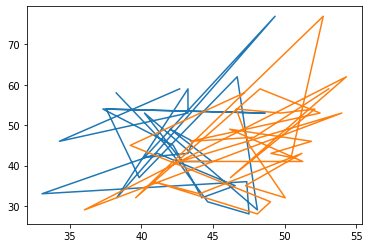

In [146]:
plt.plot(x_test2,y_test2)


In [147]:
model=LinearRegression().fit(x_train2,y_train2)
a=model.coef_
b=model.intercept_
r_sq=model.score(x_test2,y_test2)
print(a)
print(b)
print(r_sq)

[0.58336827 0.83756596]
-17.269789088833647
0.16669390789078675


In [122]:
gnb = GaussianNB()
model_gnb = gnb.fit(x_train, y_train)
y_pred=model_gnb.predict(x_test)
r_sq=model_gnb.score(x_test,y_test)
print(r_sq)

0.03333333333333333


In [86]:
#code for regression
SGDClf = linear_model.SGDClassifier(max_iter = 1000)
SGDClf.fit(x_train, y_train)
r_sq=SGDClf.score(x_train,y_train)

print(y_test)
print(r_sq)

[28, 39, 40, 59, 42, 40, 50, 53, 31, 45, 57, 61, 62, 30, 41, 35, 41, 66, 32, 49, 16, 60, 46, 52, 54, 55, 31, 59, 50, 65]
0.06722689075630252


In [89]:
ridge_model= linear_model.Ridge(alpha=2).fit(x_train,y_train)
print(ridge_model.coef_)
print(ridge_model.intercept_)
print(ridge_model.score(x_test,y_test))

[ 0.40087923 -4.02603494]
32.35104237582085
0.15111510499669245


In [ ]:
x_in=38.23259
y_out=model.coef_*x_in + model.intercept_
print(y_out)

In [ ]:
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #fit the model
    ridgereg= Ridge(alpha=alpha,normalize=true)
    ridgereg.fit(data[predictors],data['y'])
    y_pred=ridgereg.predict(data[predictors])
    
    #check if plot is to be made
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        

In [ ]:
#with batsman_model
#x_train=np.array(input_model).reshape(-1,2)
#y_train=np.array(output)

#x_test=np.array(input_model_test).reshape(-1,2)
#y_test=np.array(output_test)



In [66]:
rfr = RandomForestRegressor(n_estimators=10).fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(rfr.score(x_test,y_test))
print(y_pred)
print(y_test)

-0.060263461078625236
[48.  38.6 41.5 39.8 40.4 47.7 58.9 41.4 60.2 39.4 49.2 49.9 57.3 36.1
 49.3 47.5 55.3 46.2 57.9 50.2 41.7 52.2 43.2 41.1 44.3 49.  34.  44.4
 53.  64.4]
[28, 39, 40, 59, 42, 40, 50, 53, 31, 45, 57, 61, 62, 30, 41, 35, 41, 66, 32, 49, 16, 60, 46, 52, 54, 55, 31, 59, 50, 65]


In [100]:
#Polynomial Regression
x_3=PolynomialFeatures(degree=1).fit_transform(x_train)
x_3t=PolynomialFeatures(degree=1).fit_transform(x_test)
#y_3=PolynomialFeatures(degree=30).fit_transform(y_train)
#y_3t=PolynomialFeatures(degree=30).fit_transform(y_test)

model=LinearRegression().fit(x_3,y_train)
r_sq_3=model.score(x_3t,y_test)
y_pred_3=model.predict(x_3t)
print(y_pred_3)
print(y_test)
print(r_sq_3)

[42.98622311 44.76317176]
[32, 37]
-13.477114714232437
